# Jenah Black
# Final Project, Data Science
# May 3, 2022

## Title [WIP]

## 2. Background

Speech is typically seamless and error-free. Nevertheless, robust patterns of speech errors have greatly informed our understanding of the hierarchical nature of the language processing system. However, the processes underlying the generation of segmental errors (changes below the lexical level, e.g., 'cat' -> 'sat') are not well understood. In particular, the relative contributions of phonological, phonemic, and motor levels of production processing to the generation of segmental errors remain highly debated.  Aphasic patients with a phonological working memory deficit provide a critical test for examining the role of different levels of production in the generation of segmental errors. This is because degradation of representations in memory will result in different patterns if the unit that is being held in memory is compositional (a collection of phonetic features held at the phonetic level, for example) versus non-compositional (a discrete phoneme that does not interface with phonetic features, held at the phonological level). Specifically, if the key unit is a collection of phonetic features, the surface representations of errors in the phonetic space will exhibit continuous movement away from the target as working memory load increases. However, if the key unit is a discrete phoneme, the error is occurring at a level removed from phonetic features. Therefore, as working memory load increases, there should be no coherent movement within the phonetic space. Understanding the underlying cause of segmental errors allows us to better conceptualize the structure of the language production system, as well as the influences that act upon that system at different stages in processing.


## 3. Variables

Four native English-speaking individuals with post-stroke chronic aphasia (1 female, 3 male; ages 32 – 64) participated in the study. Demographic variables include:


- Age
    - numeric

They completed a battery of tests examining language difficulties as well as general coginitive impairments. Variables collected from the battery include: 

- Rhyme Probe Task. A measure of phonological working memory; lower score means greater impairment
    - numeric
- Category Probe Task. A measure of semantic working memory; lower score means greater impairment
    - numeric
- Pennsylvania Naming Task. A measure of production impairment. Percent of errors with a phonological locus; higher indicates greater phonological impairment
    - numeric
- Semantic-Lexical Comprehension. A measure of semantic impairment. Percent accuracy; lower score indicates greater impairment. 
    - numeric

Each patient completed several rounds of a picture naming task, in which they had to identify and name a picture of an object. Variables collected from the picture naming task include:

- Target_IPA: the word the subject was trying to produce in the International Phonetic Alphabet (typically the identify of the picture)
    - string/factor
- Target phoneme: the phoneme the subject was trying to pronounce, typically part of the identity of the picture; e.g., /p/ in ‘apple’
    - string/factor
- Response phoneme: the phoneme that was actually pronounced
    - string/factor
- Distance: the distance between the target and response phonemes, described above
    - numeric
- Length: the number of phonemes in the target word
    - numeric
- Num_Errors: the total number of errors in the word
    - numeric
- Error: whether or not an error was produced on this phoneme
    - categorical (0 = correct, 1 = error)
- Frequency: the frequency of the target word in English
    - numeric
- Target_Position: the slot number of the target phoneme (e.g., the /p/ in 'ape' would have a position of 2)
    - numeric
- rel_nearest_end_position: the distance between the target phoneme and the nearest edge of the word, divided by the length of the word. This roughly corresponds to the position of the phoneme within the word, taking length into account. For example, the /p/ in 'ape' would have a relative position of .33 (distance of 1 from the nearest edge, divided by 3)
    - numeric
- Target_Place: the place of articulation of the target phoneme (e.g., alveolar)
    - string/factor
- Response_Place: the place of articulation of the response phoneme 
    - string/factor
- Target_Manner: the manner of articulation of the target phoneme (e.g., fricative)
    - string/factor
- Response_Manner: the manner of articulation for the response phoneme 
    - string/factor
- Target_Voice: whether or not the target phoneme is voiced
    - categorical (0 = voiceless, 1 = voiced)
- Response_Voice: whether or not the response phoneme is voiced
    - categorical (0 = voiceless, 1 = voiced)
    

In total, there were 3,789 trials (each trial comprised one attempt of a subject attempting to name a picture). Further, there were 17,962 phoneme observations (since each sound in the word was coded separately). Of these phonemes, there were errors on 1,937 of them. 

## 4. Hypotheses

Explicitly state your hypothesis in terms of the structure of the models that you will be evaluating (e.g., What is the form of Y = f(X) for each hypothesis? Will you be using linear regression or classifier models?)

### 1. Distance in phonetic space between the target and the response phoneme will increase as the length of the word increases. 

This will be evaluated using linear mixed effects models for each subject individually as well as across subjects (as this study is a case series of patients, it is necessary to characterize each subject as well as the group). 

The form of the by-subject models will be: 

    Distance ~ Length + (1|Target_IPA)

The form of the across-subject model will be: 

    Distance ~ Length + (1|Target_IPA) + (1|Participant)
    
To ensure that the effect of length of ALINE distance was not altered by the phoneme’s position in the word, the analyses were repeated with a control variable, the relative position of a phoneme to the word boundaries. The motivation for including this variable comes from a large literature on positional effects in tasks that require serial recall from memory. In such tasks, items at the beginning and the end of a list are typically remembered better than items in the middle positions, creating a U-shaped distribution.

The form of the second-pass by-subjects models will be: 

    Distance ~ Length + Relative_Position + Length:Relative_Postiion + (1|Target_IPA)
    
The form of the second-pass aggregate model will be: 

    Distance ~ Length + Relative_Position + Length:Relative_Postiion + (1|Target_IPA) + (1|Participant)



### 2. Consonants prototypically produced in the back of the mouth will also result in more errors. Additionally, consonants produced with a more open mouth (e.g., fricatives and affricates) will result in more errors.

This hypothesis is derived from literature examining articulatory features of sounds that result in more errors. Typically, errors are more common with consonants, and consonants also tend to shift toward the front of the mouth  (because it is easier to produce sounds that have constrictions in the front of the mouth). Consonants also tend to become more closed (shift toward stops).

This will be in the form of a logistic model.

    Error ~ target_bilabial + target_velar + target_alveolar + target_dental + target_palatal + target_glottal + target_stop + target_fricative + target_affricate
    

## 5. Data Organization

Provide descriptions of Data Architecture (e.g., how is the data organized), Data Cleansing & Tidying, and an example of the final of the Data Table(s) that will go into your analysis.

## 6. Analyses

 Show both your data visualizations and summarize the results from your models.


In [66]:
#### Load Libraries ####

library(ggplot2, quietly = TRUE)
library(ggpubr, quietly = TRUE)
library(ggpattern, quietly = TRUE)
library(cowplot, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(tidyr, quietly = TRUE)
library(ordinal, quietly = TRUE)
library(stats, quietly = TRUE)
library(openxlsx, quietly = TRUE)
library(lmerTest, quietly = TRUE)
library(broom, quietly = TRUE)
library(purrr, quietly = TRUE)
library(ISLR, quietly = TRUE)
library(boot, quietly = TRUE)

In [4]:
#### Functions ####

# Standard Error function for error bars
std_mean <- function(x) sd(x)/sqrt(length(x))

# Function to get relative position of phoneme in word (for plotting)
get_position <- function(pos, len) {
  if(pos == 1) {return('First')}
  else if(pos == 2) {return('First + 1')}
  else if(pos == len-1) {return('Last - 1')}
  else if(pos == len) {return('Last')}
  else {return('Middle')}
}

Previously, the ALINE distances were calculated using the python implementation of ALINE, pyALINE (CITATION). Within this process, any row with targets that could not be identified for transcriptions (e.g., the participant did not produce a real word) was removed. Additionally, any rows that were not the subject's first attempt at naming the picture were removed. Finally, any row that contained a target or response transcription that was not valid IPA was removed. Extraneous whitespace was stripped from the transcriptions. 

Additional data tidying is performed below:

In [19]:
#### Load Data ####

# Load in processed data
alignments <- as.data.frame(read.xlsx("Processed_Data.xlsx", sheet="Pairs"))
head(alignments)

,participant,trial_id,item,picture,target,target_ipa,response_ipa,length,frequency,target_position,⋯,diff_voice,target_nasal,response_nasal,diff_nasal,target_lateral,response_lateral,diff_lateral,target_retroflex,response_retroflex,diff_retroflex
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,1,⋯,0,0,0,0,0,0,0,0,0,0
2,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,3,⋯,0,1,1,0,0,0,0,0,0,0
4,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,4,⋯,0,0,0,0,0,0,0,0,0,0
5,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,6,⋯,0,0,0,0,0,0,0,0,0,0


In [20]:
# Calculate the number of errors per word. Add as 'num_errors' column to alignments
alignments <- alignments %>%
  filter(!is.na(distance)) %>%
  group_by(trial_id) %>%
  mutate(num_errors = sum(distance > 0)) %>%
  ungroup()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



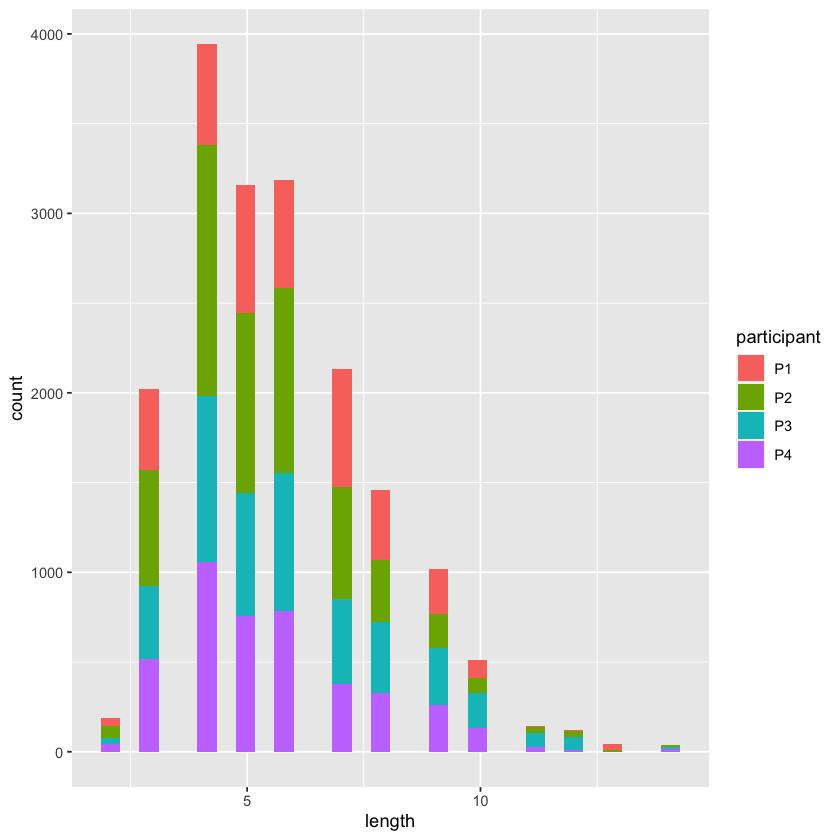

In [21]:
# Histogram of length of words. 
ggplot(data = alignments, aes(x = length, fill = participant)) +
  geom_histogram()

# My advisor and I determined that it would be appropriate to only use words up to 9 phonemes, 
# since that was the last length for which all subjects had responses

In [61]:
#### Construct Data Table for Modeling and Plots ####

# Remove words where the target is less than 3 phonemes or greater that 9 phonemes in length,
# Keep only relevant columns,
# Rename some variables for ease of use later on
model_data <- alignments %>%
  filter(length >= 3) %>%
  filter(length <= 9) %>%
  select(participant,
         trial_id,
         item,
         target = target_segment,
         target_ipa,
         target_segment,
         response_ipa,
         response_segment,
         length,
         frequency,
         cv,
         position = target_position,
         distance,
         target_voice,
         num_errors,
         diff_place , 
         diff_manner, 
         target_place,
         response_place,
         target_manner,
         response_manner) %>% 
    # Add in some additional useful variables:
    # error
    # The place of articulation of the target
    # The manner of articulation of the target.
  mutate(error = ifelse(distance == 0, 0, 1),
         target_bilabial = ifelse(target_place == 'bilabial', 1, 0),
         target_velar = ifelse(target_place == 'velar', 1, 0),
         target_alveolar = ifelse(target_place == 'alveolar', 1, 0),
         target_palatoAlveolar = ifelse(target_place == 'palato-alveolar', 1, 0),
         target_dental = ifelse(target_place == 'dental', 1, 0),
         target_palatal = ifelse(target_place == 'palatal', 1, 0),
         target_glottal = ifelse(target_place == 'glottal', 1, 0),
         target_stop = ifelse(target_manner == 'stop', 1, 0),
         target_fricative = ifelse(target_manner == 'fricative', 1, 0),
         target_approximate = ifelse(target_manner == 'approximate', 1, 0),
         target_affricate = ifelse(target_manner == 'affricate', 1, 0))

model_data$target <- as.factor(model_data$target)


Position was calculated as the distance to the nearest boundary (i.e., number of phonemes to the start or end of the word, whichever is closest) divided by the total length of the word. For example, in /tɹʌmpət/, the /p/ phoneme is two positions away from the end of the word (versus four position from the start) and the word length is seven, so its relative to a boundary is .29. 

In [63]:
# Determine distance from start and end positions
model_data$start_position <- model_data$position - 1
model_data$end_position <- model_data$length - model_data$position
model_data$nearest_end_position <- pmin(model_data$start_position, model_data$end_position)

# Divide the position by the length of the word to get the relative positions 
model_data$rel_start_position <- model_data$start_position / model_data$length
model_data$rel_end_position <- model_data$end_position / model_data$length
model_data$rel_nearest_end_position <- model_data$nearest_end_position / model_data$length

# get relative position (first, first -1, middle, last - 1, last) for each phoneme. This is used for plotting
model_data <- model_data %>% rowwise() %>% mutate(rel_position = get_position(position, length))

Production errors are influenced by the Phoneme Similarity Bias, which states that phonemes that share features are more likely to interact. As such, 'distance' is non-normally distributed, as response and target phonemes are more likely to be more similar than more different. 

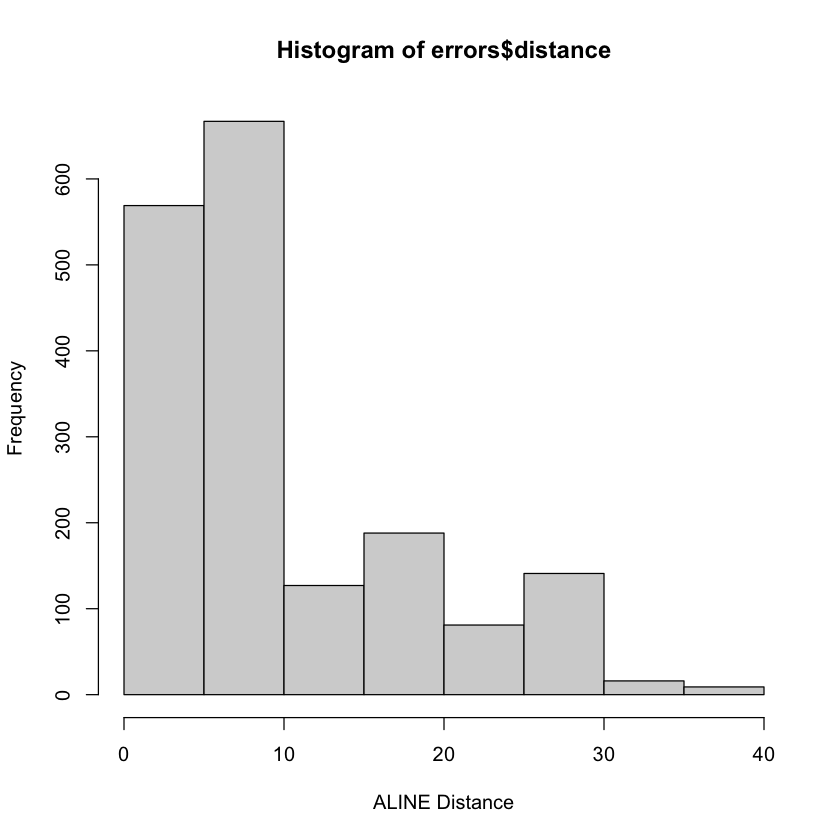

In [24]:
#To check this:

errors <- subset(model_data, distance != 0)
hist(errors$distance, xlab= 'ALINE Distance')

Yes, the distances are skewed. To approximate normality and match the assumptions of the following models, the distances can be log-transformed.

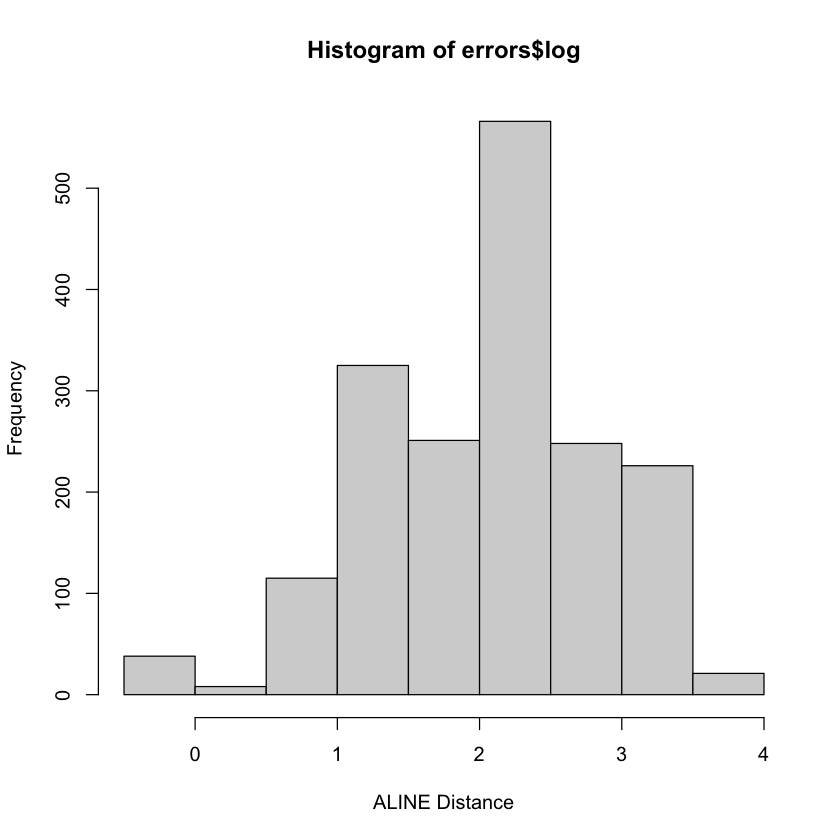

In [25]:
# As an example: 
errors$log <- log(errors$distance)
hist(errors$log, xlab= 'ALINE Distance')

# Do it for the actual data
model_data$log_distance <- log(model_data$distance +1) # adding 1 so the distances of 0 don't result in -Inf, but remain 0. 

The final dataset to be used in the models is as follows:

In [64]:
head(model_data)

participant,trial_id,item,target,target_ipa,response_ipa,response_segment,length,frequency,cv,⋯,target_fricative,target_approximate,target_affricate,start_position,end_position,nearest_end_position,rel_start_position,rel_end_position,rel_nearest_end_position,rel_position
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
P3,1,1,f,fɪŋɡəɹz,fɪŋɡəɹz,f,7,3.229682,C,⋯,1,0,0,0,6,0,0.0000000,0.8571429,0.0000000,First
P3,1,1,ɪ,fɪŋɡəɹz,fɪŋɡəɹz,ɪ,7,3.229682,V,⋯,NA,NA,NA,1,5,1,0.1428571,0.7142857,0.1428571,First + 1
P3,1,1,ŋ,fɪŋɡəɹz,fɪŋɡəɹz,ŋ,7,3.229682,C,⋯,0,0,0,2,4,2,0.2857143,0.5714286,0.2857143,Middle
P3,1,1,ɡ,fɪŋɡəɹz,fɪŋɡəɹz,ɡ,7,3.229682,C,⋯,0,0,0,3,3,3,0.4285714,0.4285714,0.4285714,Middle
P3,1,1,ə,fɪŋɡəɹz,fɪŋɡəɹz,ə,7,3.229682,V,⋯,NA,NA,NA,4,2,2,0.5714286,0.2857143,0.2857143,Middle
P3,1,1,ɹ,fɪŋɡəɹz,fɪŋɡəɹz,ɹ,7,3.229682,C,⋯,0,0,0,5,1,1,0.7142857,0.1428571,0.1428571,Last - 1


# 1. Linear Mixed Effects Models

These models will query hypothesis 1: Distance in phonetic space between the target and the response phoneme will increase as the length of the word increases. Because these data were intended for use in a case series, it is appropriate to examine each individual first and then, if appropriate, examine the data in aggregate.
 


Let's plot the relationship between length and distance in the phonetic space to see if there is an apparent relationship.

`summarise()` has grouped output by 'length'. You can override using the `.groups` argument.


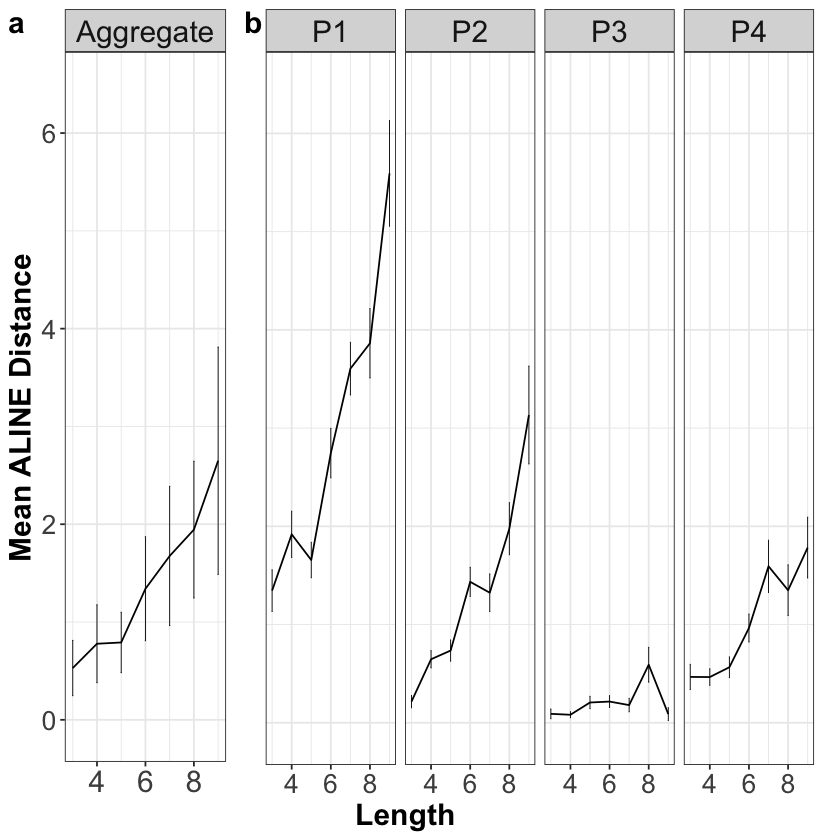

In [27]:

# Calculate subject means by length
by_participant_means_length <- model_data %>%
  group_by(length, participant) %>%
  summarize(by_participant_mean = mean(distance),
            standard_error = std_mean(distance),
            count = n_distinct(trial_id)) %>%
  mutate(meanLB = by_participant_mean - standard_error,
         meanUB = by_participant_mean + standard_error)

# Aggregate Plot Data
plot_data_length <- by_participant_means_length %>%
  group_by(length) %>%
  summarize(aggregate_mean = mean(by_participant_mean),
            standard_error = std_mean(by_participant_mean)) %>%
  mutate(meanLB = aggregate_mean - standard_error,
         meanUB = aggregate_mean + standard_error)
plot_data_length$Facet_Label <- "Aggregate"

# Aggregate Facet
length_effect_plot <- ggplot(plot_data_length, aes(x = length, y = aggregate_mean)) +
  facet_wrap(~Facet_Label) +
  geom_errorbar(aes(ymin = meanLB, ymax = meanUB),  width = 0.05, size = 0.25) +
  geom_line() +
  scale_x_continuous() +
  scale_y_continuous(limits = c(-0.1, 6.5)) +
  theme_bw() +
  labs(x = ' ', # place holder so the space for the tx-axis title remains (from subject facets)
       y = "Mean ALINE Distance",
       legend = 'Length') +
  theme(axis.title.y = element_text(size = 18, face = 'bold'), 
        axis.title.x = element_text(size = 18), 
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 16),
        strip.text.x = element_text(size = 18))
#length_effect_plot

# Subject Facets
length_effect_plot_Subject <- ggplot(by_participant_means_length, aes(x = length, y = by_participant_mean)) +
  facet_grid(~participant) +
  geom_errorbar(aes(ymin = meanLB, ymax = meanUB), width = 0.05, size = 0.25) +
  geom_line() +
  scale_x_continuous() +
  scale_y_continuous(limits = c(-0.1, 6.5)) +
  theme_bw() +
  labs(x = 'Length',
       y = "Mean ALINE Distance") +
  theme(axis.title.y = element_blank(), 
        axis.title.x = element_text(size = 18, hjust = 0.2, face = 'bold'), 
        axis.text.x = element_text(size = 16),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        strip.text.x = element_text(size = 18))
#length_effect_plot_Subject

# Combine aggregate and subject facets, position
combined_length <- ggdraw() + 
  draw_plot(length_effect_plot, x = 0, y = 0, width = .28, height = 1) +
  draw_plot(length_effect_plot_Subject, x = .30, y = 0, width = .68, height = 1) +
  draw_plot_label(label = c('a','b'), size = 18, x = c(0, .28))
combined_length

It looks like there is a relationship between length of word and the precision of the phonetic representations (i.e., the ALINE distance). It appears that as length increases, ALINE distance also increases. This relationship is less clear for Participant 3, so they may not show a statistically significant relationship.

This relationship can be examined statistically with linear mixed effects models. 

In [28]:
### Split data by subject for separate outputs


P1_data <- subset(model_data, participant == 'P1')
P2_data <- subset(model_data, participant == 'P2')
P3_data <- subset(model_data, participant == 'P3')
P4_data <- subset(model_data, participant == 'P4')


In [29]:
P1_length_1 <- lmer(scale(log_distance) ~ scale(length) + (1|target_ipa),
                    data = P1_data,
                    verbose = 0)
P1_length_1_summary <- summary(P1_length_1)
print(coef(P1_length_1_summary))

                 Estimate Std. Error       df    t value     Pr(>|t|)
(Intercept)   0.005734062 0.01945608 521.7969  0.2947182 7.683263e-01
scale(length) 0.212360062 0.01933080 540.0750 10.9855805 1.774429e-25


In [30]:
P2_length_1 <- lmer(scale(log_distance) ~ scale(length) + (1|target_ipa),
                    data = P2_data,
                    verbose = 0)
P2_length_1_summary <- summary(P2_length_1)
print(coef(P2_length_1_summary))

                Estimate Std. Error       df  t value     Pr(>|t|)
(Intercept)   0.02514282 0.02114706 410.2753 1.188951 2.351464e-01
scale(length) 0.19292041 0.02137009 407.4032 9.027590 7.049758e-18


In [31]:
P3_length_1 <- lmer(scale(log_distance) ~ scale(length) + (1|target_ipa),
                    data = P3_data,
                    verbose = 0)
P3_length_1_summary <- summary(P3_length_1)
print(coef(P3_length_1_summary))

                Estimate Std. Error       df  t value   Pr(>|t|)
(Intercept)   0.03842226 0.02653246 364.4561 1.448123 0.14844242
scale(length) 0.05260823 0.02673122 367.2198 1.968045 0.04981492


In [32]:
P4_length_1 <- lmer(scale(log_distance) ~ scale(length) + (1|target_ipa),
                    data = P4_data,
                    verbose = 0)
P4_length_1_summary <- summary(P4_length_1)
print(coef(P4_length_1_summary))

                Estimate Std. Error       df  t value     Pr(>|t|)
(Intercept)   0.05269306 0.02405073 433.7940 2.190913 2.898941e-02
scale(length) 0.16192072 0.02421743 433.1104 6.686123 7.083242e-11


All subjects showed a statistically signficant positive relationship between length and distance, even Participant 3 (though the p-value was just below 0.05.) 

Since all subjects show a similar pattern, we are justified in looking at the relationship between length and distance between-subjects.

In [34]:
aggregate_length_1 <- lmer(scale(log_distance) ~ scale(length) + 
                             (1|target_ipa) + (1|participant),
                           data = model_data,
                           verbose = 0)
aggregate_length_1_summary <- summary(aggregate_length_1)
aggregate_length_1_summary

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(log_distance) ~ scale(length) + (1 | target_ipa) + (1 |  
    participant)
   Data: model_data

REML criterion at convergence: 46149.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0196 -0.4390 -0.1694 -0.0202  5.1350 

Random effects:
 Groups      Name        Variance Std.Dev.
 target_ipa  (Intercept) 0.08802  0.2967  
 participant (Intercept) 0.07237  0.2690  
 Residual                0.84528  0.9194  
Number of obs: 16915, groups:  target_ipa, 1306; participant, 4

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     0.03318    0.13503   3.01897   0.246    0.822    
scale(length)   0.17128    0.01173 976.53831  14.596   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(lngth) -0.003

The aggregate model also shows this effect. However, increasing length of a word also changes the relative positions of the phonemes in the word. In other words, the interior phonemes are farther from the word edges in longer words than in shorter words. We know from classic literature that items at the beginning and end of a set are remembered better than items in the middle. We can visualize the data to see if this is generally the case:

`summarise()` has grouped output by 'rel_position'. You can override using the `.groups` argument.


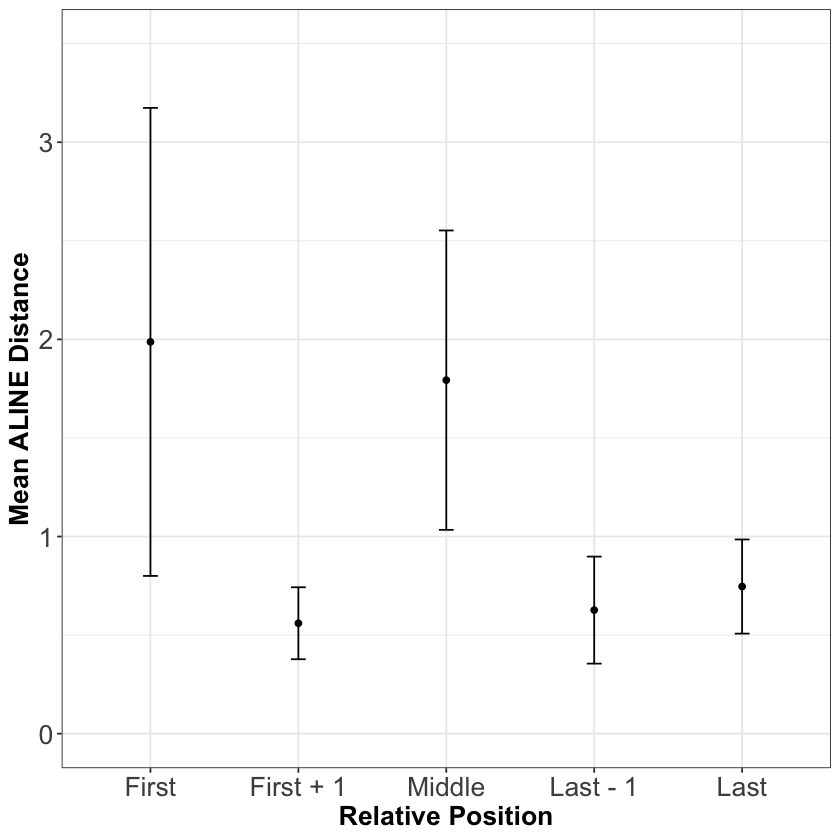

In [35]:
# Calculate the by- participant means
by_participant_means_position <- model_data %>%
  group_by(rel_position, participant) %>%
  summarize(by_participant_mean = mean(distance),
            standard_error = std_mean(distance),
            count = n_distinct(trial_id)) %>%
  mutate(meanLB = by_participant_mean - standard_error,
         meanUB = by_participant_mean + standard_error)

# Calculate means for the plot
plot_data_position <- by_participant_means_position %>%
  group_by(rel_position) %>%
  summarize(aggregate_mean = mean(by_participant_mean),
            standard_error = std_mean(by_participant_mean)) %>%
  mutate(meanLB = aggregate_mean - standard_error,
         meanUB = aggregate_mean + standard_error)

# Position plot
position_plot <- ggplot(plot_data_position, aes(x = rel_position, y = aggregate_mean)) +
  geom_point() +
  geom_errorbar(aes(ymin = meanLB, ymax = meanUB), width = 0.1) +
  scale_x_discrete(limits = c('First', 'First + 1', 'Middle', 'Last - 1', 'Last')) +
  scale_y_continuous(limits = c(0, 3.5)) +
  theme_bw() +
  labs(x = 'Relative Position',
       y = "Mean ALINE Distance") +
  theme(axis.title.y = element_text(size = 16, face = 'bold'), 
        axis.title.x = element_text(size = 16, face = 'bold'), 
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        strip.text.x = element_text(size = 12))
position_plot

It does seem to the be the case that phonemes in the middle of the word have a greater ALINE distance than those on the edges (excluding the first position, which may be influenced by 'false starts', which are common in individuals with production deficits). Thus, it is important to see if the length effect persists even when relative position is included in the model. We'll do this first for each individual subject, and then the aggregate data. 

In [36]:
P1_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position)  + scale(length):scale(rel_nearest_end_position) + 
                      (1|target_ipa),
                    data = P1_data,
                    verbose = 0)
P1_length_2_summary <- summary(P1_length_2)
print(coef(P1_length_2_summary))

                                                 Estimate Std. Error        df
(Intercept)                                   -0.01074739 0.01957937  539.7924
scale(length)                                  0.22072230 0.01946752  560.1973
scale(rel_nearest_end_position)               -0.03425109 0.01592458 3204.3730
scale(length):scale(rel_nearest_end_position)  0.08963578 0.01549008 3325.5463
                                                 t value     Pr(>|t|)
(Intercept)                                   -0.5489139 5.832915e-01
scale(length)                                 11.3379785 5.736763e-27
scale(rel_nearest_end_position)               -2.1508317 3.156405e-02
scale(length):scale(rel_nearest_end_position)  5.7866574 7.845895e-09


In [38]:
P2_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position)  + scale(length):scale(rel_nearest_end_position) + 
                      (1|target_ipa),
                    data = P2_data,
                    verbose = 0)
P2_length_2_summary <- summary(P2_length_2)
print(coef(P2_length_2_summary))

                                                  Estimate Std. Error        df
(Intercept)                                    0.023921976 0.02125024  418.6716
scale(length)                                  0.199034019 0.02148278  416.6471
scale(rel_nearest_end_position)               -0.036678882 0.01310529 4846.8838
scale(length):scale(rel_nearest_end_position)  0.007050561 0.01272570 4945.6239
                                                 t value     Pr(>|t|)
(Intercept)                                    1.1257275 2.609258e-01
scale(length)                                  9.2648163 1.053679e-18
scale(rel_nearest_end_position)               -2.7987840 5.149819e-03
scale(length):scale(rel_nearest_end_position)  0.5540412 5.795757e-01


In [39]:
P3_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position)  + scale(length):scale(rel_nearest_end_position) + 
                      (1|target_ipa),
                    data = P3_data,
                    verbose = 0)
P3_length_2_summary <- summary(P3_length_2)
print(coef(P3_length_2_summary))

                                                 Estimate Std. Error        df
(Intercept)                                   0.036332027 0.02666762  371.9555
scale(length)                                 0.051331983 0.02687735  375.2575
scale(rel_nearest_end_position)               0.006988451 0.01476693 3411.7464
scale(length):scale(rel_nearest_end_position) 0.011094959 0.01442901 3478.4819
                                                t value   Pr(>|t|)
(Intercept)                                   1.3624025 0.17389528
scale(length)                                 1.9098605 0.05691332
scale(rel_nearest_end_position)               0.4732500 0.63606508
scale(length):scale(rel_nearest_end_position) 0.7689342 0.44198459


In [40]:
P4_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position)  + scale(length):scale(rel_nearest_end_position) + 
                      (1|target_ipa),
                    data = P4_data,
                    verbose = 0)
P4_length_2_summary <- summary(P4_length_2)
print(coef(P4_length_2_summary))

                                                  Estimate Std. Error        df
(Intercept)                                    0.054386143 0.02417401  443.0617
scale(length)                                  0.163796412 0.02435195  443.4552
scale(rel_nearest_end_position)               -0.009251078 0.01457793 3603.5282
scale(length):scale(rel_nearest_end_position) -0.009815371 0.01415398 3675.6020
                                                 t value     Pr(>|t|)
(Intercept)                                    2.2497776 2.495314e-02
scale(length)                                  6.7262139 5.385637e-11
scale(rel_nearest_end_position)               -0.6345948 5.257330e-01
scale(length):scale(rel_nearest_end_position) -0.6934708 4.880579e-01


Almost all subjects maintain a significant effect of length even when relative position is included in the model. Participant 3 did not maintain a significant effect, but the overall shape of the relationship was maintained. Additionally, relative position and the interaction between relative position and length appeared to have an effect in some participants, but not all. 

We can now examine these data at the aggregate level. 

In [41]:
aggregate_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position) + scale(length):scale(rel_nearest_end_position) + 
                             (1|target_ipa) + (1|participant),
                           data = model_data,
                           verbose = 0)
aggregate_length_2_summary <- summary(aggregate_length_2)
aggregate_length_2_summary

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position) +  
    scale(length):scale(rel_nearest_end_position) + (1 | target_ipa) +  
    (1 | participant)
   Data: model_data

REML criterion at convergence: 46139.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0224 -0.4360 -0.1712 -0.0131  5.1031 

Random effects:
 Groups      Name        Variance Std.Dev.
 target_ipa  (Intercept) 0.08793  0.2965  
 participant (Intercept) 0.07227  0.2688  
 Residual                0.84405  0.9187  
Number of obs: 16915, groups:  target_ipa, 1306; participant, 4

Fixed effects:
                                                Estimate Std. Error         df
(Intercept)                                    2.808e-02  1.349e-01  3.020e+00
scale(length)                                  1.746e-01  1.180e-02  1.001e+03
scale(rel_nearest_end_position)               -2.294e-02  7.198e-03

The positive, significant length effect was maintained when examined across-subjects. Additionally, relative position and the interaction between relative position and length also had a small signficant relationship, but relative position negatively influenced distance, such that as a phoneme's distance from the end points increased, its distance decreased (corresponding to an increased in precision of the representation.) This is the opposite effect than what we would expect from the primacy and recency literature, and is likely primarily driven by the frequency of errors on the first phoneme in the word. 

Earlier, we established that patterns of changes in precision can tell us something about the composition of the representation that is held in memory. These results suggest that the unit held in memory is composed of phonetic features, because we see that degrading precision results in continuous movement within the phonetic space. 

# 2. Classifier

An additional question we might ask is if particular features of the target influece whether or not a participant is likely to make an error.  It has also been observed that more errors occur on consonants than on vowels. To determine if this is true for our data, we can visualize the differences between the error rates, taking into account the different frequencies of consonants and vowels in the dataset:

cv,Proportion_Correct,name,value
<chr>,<dbl>,<chr>,<dbl>
C,0.8821439,Error,1194
C,0.8821439,Correct,8937
V,0.9109670,Error,604
V,0.9109670,Correct,6180


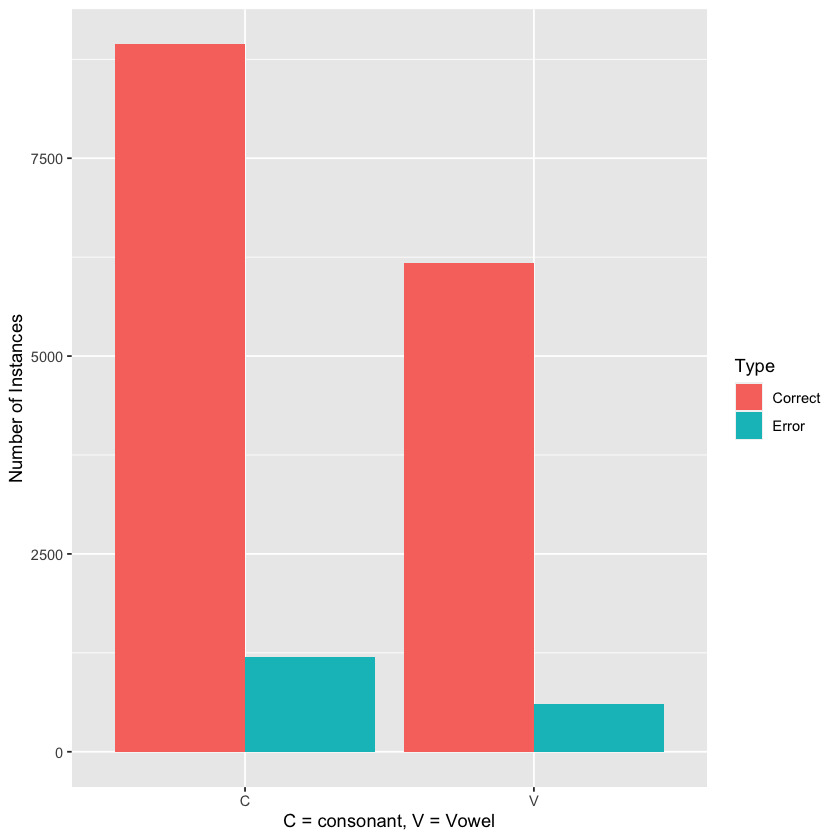

In [55]:
cv_summary <- model_data %>%
  group_by(cv) %>%
  summarize(Error = sum(error),
            Correct = sum(error==0),
            Proportion_Correct = Correct / (Error+Correct))
cv_summary_long <- pivot_longer(cv_summary, cols = c('Error','Correct'))
cv_summary_long

ggplot(data = cv_summary_long, aes(x = cv, y = value, fill = name)) +
  geom_bar(stat = 'identity', position = position_dodge(width = .9)) +
  labs(x = 'C = consonant, V = Vowel',
       y = 'Number of Instances',
       fill = 'Type')

For consonants, 88% of consonsants were produced correctly. For vowels, 91% of consonants were produced correctly. Therefore, it does seem like consonants result in more errors, in line with our predictions. 

To determine if CV status (consonant or vowel) has as statistical relationship relationship to errors, we can use a logisitic model:

In [57]:
log_model_cv = glm(error ~ cv, data = model_data, family = 'binomial')
summary(log_model_cv)


Call:
glm(formula = error ~ cv, family = "binomial", data = model_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5008  -0.5008  -0.5008  -0.4319   2.1994  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.01289    0.03081 -65.327  < 2e-16 ***
cvV         -0.31261    0.05260  -5.943  2.8e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11458  on 16914  degrees of freedom
Residual deviance: 11422  on 16913  degrees of freedom
AIC: 11426

Number of Fisher Scoring iterations: 5


It does appear that there is a significant relationship between CV status and probability of error. Specifically, if a phoneme is a vowel, it is less likely to be an error. 

The data have followed our theoretical intuitions so far. We know from previous research involving people with motor planning deficits (in the context of speech) that people tend to simplify their articulations of consonants. This simplification typically results in a change in the place or manner of articulation-- that is, the place in the mouth where a constriction is made and the degree of constriction that is made. For example, a /p/ sound is produced by making a complete closure at the lips. We can examine the relationship of different places and manners of articulation using another logisitc model, but only using the data from the consonants:

In [65]:
# separate out consonant data
consonant_data <- subset(model_data, cv == 'C')
consonant_data <- na.omit(consonant_data)
head(consonant_data)

consonant_model = glm(error ~ target_bilabial +
                        target_dental +
                        target_alveolar + 
                        target_palatoAlveolar +
                        target_palatal +  
                        target_velar +
                        target_glottal +
                        target_stop +
                        target_fricative +
                        target_affricate,
                        family = 'binomial',
                        data = consonant_data)

summary(consonant_model)

participant,trial_id,item,target,target_ipa,response_ipa,response_segment,length,frequency,cv,⋯,target_fricative,target_approximate,target_affricate,start_position,end_position,nearest_end_position,rel_start_position,rel_end_position,rel_nearest_end_position,rel_position
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
P3,1,1,f,fɪŋɡəɹz,fɪŋɡəɹz,f,7,3.229682,C,⋯,1,0,0,0,6,0,0.0000000,0.8571429,0.0000000,First
P3,1,1,ŋ,fɪŋɡəɹz,fɪŋɡəɹz,ŋ,7,3.229682,C,⋯,0,0,0,2,4,2,0.2857143,0.5714286,0.2857143,Middle
P3,1,1,ɡ,fɪŋɡəɹz,fɪŋɡəɹz,ɡ,7,3.229682,C,⋯,0,0,0,3,3,3,0.4285714,0.4285714,0.4285714,Middle
P3,1,1,ɹ,fɪŋɡəɹz,fɪŋɡəɹz,ɹ,7,3.229682,C,⋯,0,0,0,5,1,1,0.7142857,0.1428571,0.1428571,Last - 1
P3,1,1,z,fɪŋɡəɹz,fɪŋɡəɹz,z,7,3.229682,C,⋯,1,0,0,6,0,0,0.8571429,0.0000000,0.0000000,Last
P3,2,2,k,kæt,kæt,k,3,3.529430,C,⋯,0,0,0,0,2,0,0.0000000,0.6666667,0.0000000,First



Call:
glm(formula = error ~ target_bilabial + target_dental + target_alveolar + 
    target_palatoAlveolar + target_palatal + target_velar + target_glottal + 
    target_stop + target_fricative + target_affricate, family = "binomial", 
    data = consonant_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6080  -0.5505  -0.4355  -0.3310   2.7273  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -3.0492     0.1851 -16.476  < 2e-16 ***
target_bilabial        -0.1093     0.1893  -0.578   0.5636    
target_dental           0.4241     0.3639   1.166   0.2438    
target_alveolar         0.1722     0.1595   1.080   0.2804    
target_palatoAlveolar   0.7594     0.1856   4.091 4.30e-05 ***
target_palatal          2.4030     0.3936   6.105 1.03e-09 ***
target_velar            0.4366     0.1885   2.317   0.0205 *  
target_glottal         -1.8842     0.6003  -3.139   0.0017 ** 
target_stop             0.8507     0.110

This model has interesting results. Some of the predictors are signficant, but not all. Critically, it appears the predictors are are not significant are particular places of articulation: bilabial, dental, and alveolar. These are all places of articulation at the front of the mouth. The place predictors that do have a significant positive relationship with error are all places in the back of the mouth: palato-alveolar, palatal, velar, and glottal. These results support findings from previous literature which show that people tend to move consonants further front in the mouth-- we would expect more errors on 'back' consonants as they move front, but 'front' consonants are already in a simpler form. 

All three of the manner of articulation predictors were significant. I am not entirely sure how to interpret these results in the context of the literature, as we hypothesized that stops would be produced with the greatest accuracy.  

# Bootstrapping & Permutation Testing

Some of our results intersect in an interesting way with previous literature. Therefore, it would be interesting to see the 

## 7. Conclusions

A short (1 paragraph) conclusion with respect to the models you have run